In [1]:
%matplotlib inline
import pandas as pd
import scipy.stats as stats
import scipy.cluster.hierarchy as clust
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Hamda\anaconda3New\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
reads = pd.read_csv('../InputData/Dede/counts.txt', index_col=0, sep='\t')
reads.head()


,GENE,A549.T2A.Ex,A549.T2B.Ex,A549.T2C.Ex,HT29.T2A.Ex,HT29.T2B.Ex,HT29.T2C.Ex,OVCAR8.T2A.Ex,OVCAR8.T2B.Ex,OVCAR8.T2C.Ex,plasmid.T0.Ex
GENE_CLONE,,,,,,,,,,,
AARS_AGGTCACCGTAGATGGTTCCAAT_CDX4_TCGCACTATATGGGGTATCCTCA,AARS.1:CDX4.2,377,262,272,206,91,77,49,100,62,2926
AARS_CCTTGAGCAGTATTTGAGAACAC_F13B_GTTGGTACCCAGAATCTCCTGTA,AARS.2:F13B.3,1039,569,909,686,418,489,240,256,225,3024
AARS_CTGTCCAGGATGCGACGCCCTCT_SPEM1_AGGGGCCTTTCCTCTACGGTAGG,AARS.3:SPEM1.1,171,97,89,23,25,12,24,45,35,642
ABHD16A_CCATCCACCGCCTAGGCTTCCAG_GPX6_GTTCACTGCAGGTATGTGTGTCC,ABHD16A.1:GPX6.3,7157,4135,4848,6482,4705,4138,4668,5050,4475,4119
ABHD16A_CTCTCCACCTACCTCGGAGGCAG_GSX2_CCCGCGGGTGAACCATGCGCATC,ABHD16A.2:GSX2.3,85,5,77,66,39,73,66,21,39,119


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


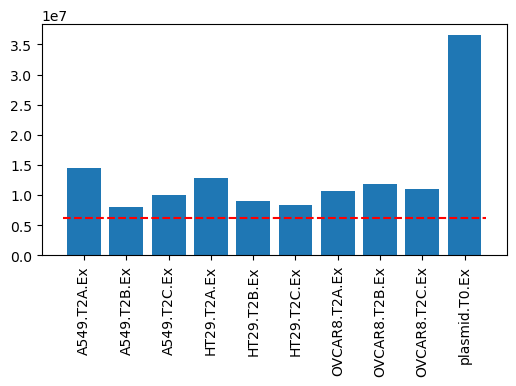

In [3]:
%pylab inline
numGuides, numSamples = reads.shape
# 12328 rows = numGuides and numSamples = 11 columns
sample_sum = reads.iloc[:,range(1,numSamples)].sum(0)

figure( figsize(6,3))
bar( arange(len(sample_sum)), sample_sum, align='center')
plot( [-0.5, len(sample_sum)-0.5], [numGuides*500, numGuides*500], 'r--')  #This is for the red dashed line, r for red
#Format string fmt = '[marker][line][color]' why is this line

xlim(-1, len(sample_sum)) # len(sample_sum) = 10
xticks(arange(len(sample_sum)), reads.columns.values[1:], rotation=90)

show()

In [4]:
pseudo=5
reads[ reads.columns[1:]] = reads[ reads.columns[1:]] + pseudo


In [5]:
meanReads = reads.iloc[:,range(1,numSamples)].mean(0) # colmean
meanReads

A549.T2A.Ex      1181.587443
A549.T2B.Ex       656.341256
A549.T2C.Ex       812.048589
HT29.T2A.Ex      1044.957414
HT29.T2B.Ex       734.867051
HT29.T2C.Ex       678.460091
OVCAR8.T2A.Ex     863.807592
OVCAR8.T2B.Ex     966.416694
OVCAR8.T2C.Ex     898.433079
plasmid.T0.Ex    2966.862103
dtype: float64

In [6]:
normed = pd.DataFrame(index=reads.index, columns=reads.columns) # empty data frame
normed['GENE'] = reads.iloc[:, 0]
#pseudo has already been added to reads
#The numpy.tile() function constructs a new array by repeating array – ‘arr’, 
#the number of times we want to repeat as per repetitions. 
#The resulted array will have dimensions max(arr.ndim, repetitions) where, 
#repetitions is the length of repetitions. If arr.ndim > repetitions,
#reps is promoted to arr.ndim by pre-pending 1’s to it.
#
#If arr.ndim < repetitions, reps is promoted to arr.ndim by pre-pending new axis. Syntax : 
normed[ normed.columns[1:] ] =   (reads.iloc[:, range(1, numSamples)] ) / np.tile(meanReads.values, [numGuides, 1]) * 500  # normalize to mean 500 read
normed.shape


(12328, 11)

In [7]:
fc = pd.DataFrame(index=reads.index, columns=reads.columns[:-1]) # non-normalised
fc['GENE'] = reads.iloc[:, 0]  # first column is gene name

numFCsamples = fc.shape[1]-1   # number of columns for which to calculate FC
numFCsamples

pseudo = 0 # remmeber pseudocount is already in the data 

# calculation fc wrt to last column, fc of each cell line/replicate wrt to sample at t0
fc[ fc.columns[1:] ] = log2( (normed[ normed.columns[1:-1]] + pseudo) / np.tile( normed[ normed.columns[-1]] + pseudo , [numFCsamples, 1]).T )


In [8]:
genelist = {}
for idx in fc.index.values:
    g1cid, g2cid = fc.loc[idx]['GENE'].split(':')
    g1, cid1 = g1cid.split('.')
    g2, cid2 = g2cid.split('.')
    genelist[g1]=1
    genelist[g2]=1
    fc.loc[idx,'GENE1']=g1
    fc.loc[idx,'GENE2']=g2
    
fc

,GENE,A549.T2A.Ex,A549.T2B.Ex,A549.T2C.Ex,HT29.T2A.Ex,HT29.T2B.Ex,HT29.T2C.Ex,OVCAR8.T2A.Ex,OVCAR8.T2B.Ex,OVCAR8.T2C.Ex,GENE1,GENE2
GENE_CLONE,,,,,,,,,,,,
AARS_AGGTCACCGTAGATGGTTCCAAT_CDX4_TCGCACTATATGGGGTATCCTCA,AARS.1:CDX4.2,-1.611537,-1.280061,-1.534135,-2.290584,-2.918832,-3.031023,-3.982134,-3.184711,-3.727633,AARS,CDX4
AARS_CCTTGAGCAGTATTTGAGAACAC_F13B_GTTGGTACCCAGAATCTCCTGTA,AARS.2:F13B.3,-0.208508,-0.223299,0.140724,-0.626590,-0.826729,-0.487657,-1.847832,-1.918499,-1.995681,AARS,F13B
AARS_CTGTCCAGGATGCGACGCCCTCT_SPEM1_AGGGGCCTTTCCTCTACGGTAGG,AARS.3:SPEM1.1,-0.549979,-0.488777,-0.913733,-3.024773,-2.417349,-3.121557,-2.699485,-2.075545,-2.292239,AARS,SPEM1
ABHD16A_CCATCCACCGCCTAGGCTTCCAG_GPX6_GTTCACTGCAGGTATGTGTGTCC,ABHD16A.1:GPX6.3,2.124530,2.182006,2.104132,2.159001,2.205065,2.135234,1.960461,1.911887,1.842909,ABHD16A,GPX6
ABHD16A_CTCTCCACCTACCTCGGAGGCAG_GSX2_CCCGCGGGTGAACCATGCGCATC,ABHD16A.2:GSX2.3,0.865868,-1.455848,1.272656,0.701045,0.518618,1.459808,0.975707,-0.635536,0.228690,ABHD16A,GSX2
...,...,...,...,...,...,...,...,...,...,...,...,...
ZSWIM6_CTTACACAGAGCTACCCCATAAA_ZSWIM4_GGGAGGTGCTGTTCCGGGAGAGC,ZSWIM6.2:ZSWIM4.2,0.164500,-0.078877,0.196364,-0.203034,-0.041976,0.076634,0.039238,0.026299,-0.074538,ZSWIM6,ZSWIM4
ZSWIM6_CTTACACAGAGCTACCCCATAAA_ZSWIM4_GTCGTTTCCACGCAGTGAACGGG,ZSWIM6.2:ZSWIM4.3,-0.764001,-0.856824,-0.628576,-0.281059,-0.158087,-0.281078,-0.494260,-0.293863,-0.213748,ZSWIM6,ZSWIM4
ZSWIM6_GCGGCAACAAGGCACTGCAATGA_ZSWIM4_GGCCTCACCCAGCTCATCCCAGA,ZSWIM6.3:ZSWIM4.1,0.603729,0.783599,0.607877,0.672730,0.297751,0.637253,0.178983,0.249882,0.162471,ZSWIM6,ZSWIM4


In [9]:
noness = pd.read_csv('../InputData/Dede/pan-species-control-nonessentials-50genes.txt', sep='\t', index_col=0)
noness.head()

,Mouse,Rat
Human,,
ADH7,Adh7,Adh7
APOBEC1,Apobec1,Apobec1
BMP15,Bmp15,Bmp15
BPIFB6,Bpifb6,Bpifb6
C3orf30,4930435E12Rik,RGD1306995


In [10]:
fc_base = fc
# So whereever a non essential is used, replace it with CTRL
fc_base.loc[ fc_base['GENE1'].isin(noness.index), 'GENE1' ] = 'CTRL'
fc_base.loc[ fc_base['GENE2'].isin(noness.index), 'GENE2' ] = 'CTRL'
fc_base.head()

,GENE,A549.T2A.Ex,A549.T2B.Ex,A549.T2C.Ex,HT29.T2A.Ex,HT29.T2B.Ex,HT29.T2C.Ex,OVCAR8.T2A.Ex,OVCAR8.T2B.Ex,OVCAR8.T2C.Ex,GENE1,GENE2
GENE_CLONE,,,,,,,,,,,,
AARS_AGGTCACCGTAGATGGTTCCAAT_CDX4_TCGCACTATATGGGGTATCCTCA,AARS.1:CDX4.2,-1.611537,-1.280061,-1.534135,-2.290584,-2.918832,-3.031023,-3.982134,-3.184711,-3.727633,AARS,CTRL
AARS_CCTTGAGCAGTATTTGAGAACAC_F13B_GTTGGTACCCAGAATCTCCTGTA,AARS.2:F13B.3,-0.208508,-0.223299,0.140724,-0.626590,-0.826729,-0.487657,-1.847832,-1.918499,-1.995681,AARS,CTRL
AARS_CTGTCCAGGATGCGACGCCCTCT_SPEM1_AGGGGCCTTTCCTCTACGGTAGG,AARS.3:SPEM1.1,-0.549979,-0.488777,-0.913733,-3.024773,-2.417349,-3.121557,-2.699485,-2.075545,-2.292239,AARS,CTRL
ABHD16A_CCATCCACCGCCTAGGCTTCCAG_GPX6_GTTCACTGCAGGTATGTGTGTCC,ABHD16A.1:GPX6.3,2.124530,2.182006,2.104132,2.159001,2.205065,2.135234,1.960461,1.911887,1.842909,ABHD16A,CTRL
ABHD16A_CTCTCCACCTACCTCGGAGGCAG_GSX2_CCCGCGGGTGAACCATGCGCATC,ABHD16A.2:GSX2.3,0.865868,-1.455848,1.272656,0.701045,0.518618,1.459808,0.975707,-0.635536,0.228690,ABHD16A,CTRL


In [11]:
cells = list(['A549','HT29','OVCAR8'])
cols = list(['GENE']) + cells
fc_merge = pd.DataFrame( columns=cols, index=fc.index, dtype=float)
fc_merge.GENE = fc.GENE
for cell in cells:
    samples = [x for x in fc.columns if cell in x]
    fc_merge[cell] = fc[ samples ].mean(1)
fc_merge['GENE1'] = fc.GENE1
fc_merge['GENE2'] = fc.GENE2
fc_merge.head()


,GENE,A549,HT29,OVCAR8,GENE1,GENE2
GENE_CLONE,,,,,,
AARS_AGGTCACCGTAGATGGTTCCAAT_CDX4_TCGCACTATATGGGGTATCCTCA,AARS.1:CDX4.2,-1.475245,-2.746813,-3.631493,AARS,CTRL
AARS_CCTTGAGCAGTATTTGAGAACAC_F13B_GTTGGTACCCAGAATCTCCTGTA,AARS.2:F13B.3,-0.097028,-0.646992,-1.920671,AARS,CTRL
AARS_CTGTCCAGGATGCGACGCCCTCT_SPEM1_AGGGGCCTTTCCTCTACGGTAGG,AARS.3:SPEM1.1,-0.650830,-2.854560,-2.355756,AARS,CTRL
ABHD16A_CCATCCACCGCCTAGGCTTCCAG_GPX6_GTTCACTGCAGGTATGTGTGTCC,ABHD16A.1:GPX6.3,2.136889,2.166433,1.905086,ABHD16A,CTRL
ABHD16A_CTCTCCACCTACCTCGGAGGCAG_GSX2_CCCGCGGGTGAACCATGCGCATC,ABHD16A.2:GSX2.3,0.227559,0.893157,0.189620,ABHD16A,CTRL


In [13]:
# Get SMF for each gene (gene-CTRL pairs)
is_ctrl = where( (fc_merge.GENE1=='CTRL') | (fc_merge.GENE2=='CTRL') )[0]
len(is_ctrl) # 5124 screens with CTRLs used  so we used them to measure SMF of each gene
fc_merge.iloc[is_ctrl].head()
is_ctrl1 = where( fc_merge.GENE1=='CTRL' )[0]
is_ctrl2 = where( fc_merge.GENE2=='CTRL' )[0]


In [14]:
smf_gene1 = fc_merge.iloc[is_ctrl2].groupby('GENE1').mean(numeric_only = True) # calculate means of multiple runs of same gene
smf_gene2 = fc_merge.iloc[is_ctrl1].groupby('GENE2').mean(numeric_only = True)
smf_gene1

,A549,HT29,OVCAR8
GENE1,,,
AARS,-0.741034,-2.082788,-2.635973
ABHD16A,0.852547,1.105957,0.741089
ABHD4,0.059904,0.110530,-0.001477
ABHD5,0.007686,-0.153288,-0.089091
ABL1,0.294523,0.399359,0.314825
...,...,...,...
ZSCAN21,0.045640,0.071998,0.204235
ZSCAN29,0.166433,0.165311,0.143173
ZSCAN30,0.048050,0.305693,0.196088


In [15]:
smf_guide1 = fc_merge.iloc[is_ctrl2].groupby('GENE1')
smf_guide1.head()
smf_guide2 = fc_merge.iloc[is_ctrl1].groupby('GENE2')

smf_gene1

,A549,HT29,OVCAR8
GENE1,,,
AARS,-0.741034,-2.082788,-2.635973
ABHD16A,0.852547,1.105957,0.741089
ABHD4,0.059904,0.110530,-0.001477
ABHD5,0.007686,-0.153288,-0.089091
ABL1,0.294523,0.399359,0.314825
...,...,...,...
ZSCAN21,0.045640,0.071998,0.204235
ZSCAN29,0.166433,0.165311,0.143173
ZSCAN30,0.048050,0.305693,0.196088


In [16]:
smf_gene = smf_gene1.join(smf_gene2, lsuffix='_Aposn', rsuffix='_Bposn')
smf_gene # so this dataset has CTRL-GENE as A_549_Bposn and GENE-CTRL a sA_549_APosn

,A549_Aposn,HT29_Aposn,OVCAR8_Aposn,A549_Bposn,HT29_Bposn,OVCAR8_Bposn
GENE1,,,,,,
AARS,-0.741034,-2.082788,-2.635973,-0.668416,-2.506181,-3.637381
ABHD16A,0.852547,1.105957,0.741089,0.594094,0.241771,-0.292801
ABHD4,0.059904,0.110530,-0.001477,0.629163,0.937724,0.523919
ABHD5,0.007686,-0.153288,-0.089091,-0.024912,-0.058102,-0.112951
ABL1,0.294523,0.399359,0.314825,0.251243,0.071616,0.361477
...,...,...,...,...,...,...
ZSCAN21,0.045640,0.071998,0.204235,-0.018941,-0.192658,0.056733
ZSCAN29,0.166433,0.165311,0.143173,0.172262,0.040094,-0.010373
ZSCAN30,0.048050,0.305693,0.196088,0.550572,0.261162,0.252039


A549: PearsonRResult(statistic=0.8740735248499165, pvalue=2.699684006263218e-265)
HT29: PearsonRResult(statistic=0.9386222225802733, pvalue=0.0)
OVCAR8: PearsonRResult(statistic=0.9387757248745127, pvalue=0.0)


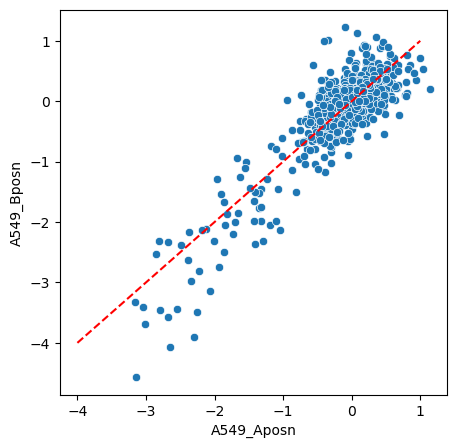

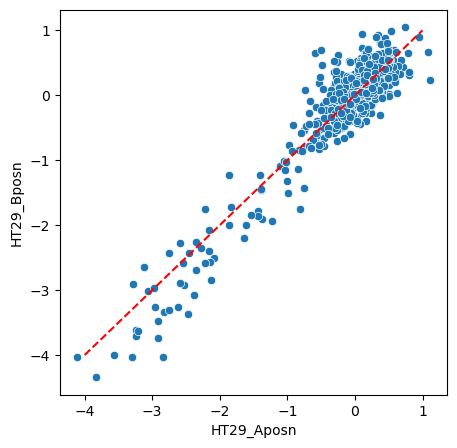

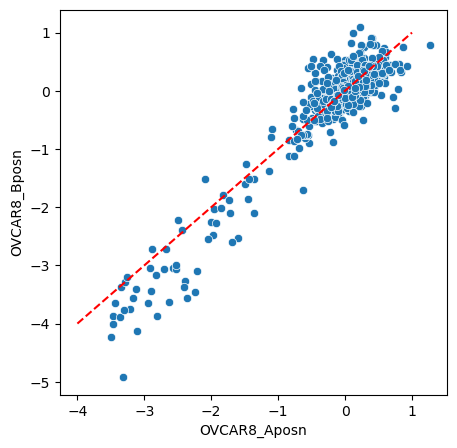

In [17]:
for cell in cells:
    f, ax = pyplot.subplots(figsize=(5,5))
    sns.scatterplot(data=smf_gene, x=cell + '_Aposn',y=cell + '_Bposn', ax=ax)
    plot([-4,1],[-4,1],'r--')
    print(cell + ': ' + str( stats.pearsonr( smf_gene[ cell + '_Aposn' ], smf_gene[cell + '_Bposn' ])) ) 

In [17]:
# A_posn and B_posn of each gene is averaged
for cell in cells:
    smf_gene[cell] = smf_gene[ [cell + '_Aposn', cell + '_Bposn'] ].mean(1)
    smf_gene.drop( [cell + '_Aposn', cell + '_Bposn'], axis=1, inplace=True )
    
smf_gene


,A549,HT29,OVCAR8
GENE1,,,
AARS,-0.704725,-2.294484,-3.136677
ABHD16A,0.723321,0.673864,0.224144
ABHD4,0.344534,0.524127,0.261221
ABHD5,-0.008613,-0.105695,-0.101021
ABL1,0.272883,0.235487,0.338151
...,...,...,...
ZSCAN21,0.013349,-0.060330,0.130484
ZSCAN29,0.169348,0.102702,0.066400
ZSCAN30,0.299311,0.283427,0.224064


In [18]:
pairs = fc_merge[(fc_merge['GENE1'] != "CTRL") & (fc_merge['GENE2'] != "CTRL")] # These are all experiments without control,
pairs =  pairs[["GENE1", "GENE2"]]
pairs =pairs.drop_duplicates(keep='first')
pairs.insert(2, "GENE1_GENE2",np.tile("ZZ",len(pairs)), True)



pairs.columns
for ind in pairs.index:
    g1 = pairs.loc[ind, 'GENE1']
    g2 = pairs.loc[ind, 'GENE2']
    newval = g1 + "_" + g2
    if g1 > g2:
        newval = g2 + "_" + g1
    pairs.loc[ind,"GENE1_GENE2"] = newval
#    print(g1_g2)
#print(pairs.columns)
   
pairs
print(len(pairs))
pairs.drop_duplicates(subset="GENE1_GENE2", keep="first",inplace = True)
print(len(pairs))
pairs

806
403


,GENE1,GENE2,GENE1_GENE2
GENE_CLONE,,,
ABHD4_AAGTCCGGCCGGAATCGCTGCAC_ABHD5_ATTAGGTGTGCCTTGCACATACA,ABHD4,ABHD5,ABHD4_ABHD5
ABL1_CCGTCTGAGATACTGGATTCCTG_ABL2_ACAGCAACTGTAAGGCTGTATTT,ABL1,ABL2,ABL1_ABL2
ABR_CAGGAAGCACCAGCAGTATGACT_BCR_ACCACGAGCGCGGCCTGGTGAAG,ABR,BCR,ABR_BCR
ACAP2_CGACACATAGCCCTCGATTATGT_ACAP3_CACCGCAGAGTCGATCACCAGCT,ACAP2,ACAP3,ACAP2_ACAP3
ACTG1_AGACCTTCAACACCCCGGCCATG_ACTR1B_AGGTTGTCCGGACAATCAAAGAG,ACTG1,ACTR1B,ACTG1_ACTR1B
...,...,...,...
ZNF619_ACAGTCCAGGATCATGAATCTTC_ZNF620_ACAGATACCTCAGCCAGGCACCA,ZNF619,ZNF620,ZNF619_ZNF620
ZNF747_AGCAGATTCCAGAAACAAGGAAG_ZNF764_CCTGGCGCTCCACACTGGTGGAG,ZNF747,ZNF764,ZNF747_ZNF764
ZNF764_CCTGGCGCTCCACACTGGTGGAG_ZNF785_AGCAGGGGCCAAGGACAGGAAGC,ZNF764,ZNF785,ZNF764_ZNF785


In [19]:
dLFC = pd.DataFrame( index=list(pairs.GENE1 + "_" + pairs.GENE2), columns=fc_merge.columns[:-2], dtype=float)
dLFC.head(3)
dLFC.drop('GENE', inplace = True, axis = 1)
dLFC

,A549,HT29,OVCAR8
ABHD4_ABHD5,NaN,NaN,NaN
ABL1_ABL2,NaN,NaN,NaN
ABR_BCR,NaN,NaN,NaN
ACAP2_ACAP3,NaN,NaN,NaN
ACTG1_ACTR1B,NaN,NaN,NaN
...,...,...,...
ZNF619_ZNF620,NaN,NaN,NaN
ZNF747_ZNF764,NaN,NaN,NaN
ZNF764_ZNF785,NaN,NaN,NaN
ZSCAN21_ZSCAN30,NaN,NaN,NaN


In [20]:
fc = fc_merge
for pair_idx in pairs.index:
    g1 = pairs.loc[pair_idx].GENE1
    g2 = pairs.loc[pair_idx].GENE2
    expt_idx  = list( where( ( (fc.GENE1==g1) & (fc.GENE2==g2) ) | ( (fc.GENE1==g2) & (fc.GENE2==g1) )  )[0] )
    if ( len(expt_idx)==0 ):
        continue
    smf_sum = smf_gene.loc[g1] + smf_gene.loc[g2]
    expt = fc.iloc[ expt_idx ]
    genepair = g1 + "_" + g2
    dLFC.loc[genepair] = expt.median(0, numeric_only=True) - smf_sum

In [23]:
print(len(dLFC)) # 2 pairs not present here # All pairs were not listed in the file given by authors
dropme = where( isnan( dLFC.A549) )[0]
dropme
dLFC.drop( dLFC.index[dropme], axis=0, inplace=True)
print(len(dLFC)) # 2 pairs not present here


403
403


In [28]:
zdLFC = pd.DataFrame( index=dLFC.index, columns=dLFC.columns, dtype=float ) 
zdLFC.head()

,A549,HT29,OVCAR8
ABHD4_ABHD5,NaN,NaN,NaN
ABL1_ABL2,NaN,NaN,NaN
ABR_BCR,NaN,NaN,NaN
ACAP2_ACAP3,NaN,NaN,NaN
ACTG1_ACTR1B,NaN,NaN,NaN


In [29]:
#To compare across screens, convert dLFC scores to a Z score, zdLFC, by truncating
#the top and bottom 2.5% of dLFC scores. At a zdLFC score < − 3, all three
#screens showed high concordance, with 19 of 24 (79%) synthetic lethals present in at
#least two out of three cell lines and 14 of 24 (58%) present in all three (Fig. 4a, b)

#Z-transformation of distribution of dLFC (zdLFC) after truncating top/bottom 2.5%
#of values approximates a normal distribution.

percentile = 2.5
for col in zdLFC.columns:
    #print(col)
    top = np.percentile( dLFC.loc[:,col], percentile)
    bot = np.percentile( dLFC.loc[:,col], 100-percentile)
    #print(top,bot)
    mu = dLFC.iloc[ where( (dLFC[col]>top) & (dLFC[col]<bot))[0] ][col].mean() # This is because our dist is truncated normal
    std = dLFC.iloc[ where( (dLFC[col]>top) & (dLFC[col]<bot))[0] ][col].std()
    #print(mu, std)
    zdLFC[col] = (dLFC[col] - mu) / std

In [30]:
zdLFC

,A549,HT29,OVCAR8
ABHD4_ABHD5,-0.607016,-0.037011,-0.048302
ABL1_ABL2,0.087697,0.886663,0.080356
ABR_BCR,1.883471,0.778018,1.044274
ACAP2_ACAP3,2.692670,1.999119,2.080933
ACTG1_ACTR1B,0.946709,3.524901,4.763899
...,...,...,...
ZNF619_ZNF620,0.285157,-0.102048,0.170539
ZNF747_ZNF764,1.462064,0.714486,0.929625
ZNF764_ZNF785,0.521223,0.533311,0.623892
ZSCAN21_ZSCAN30,0.343290,0.253739,0.340751


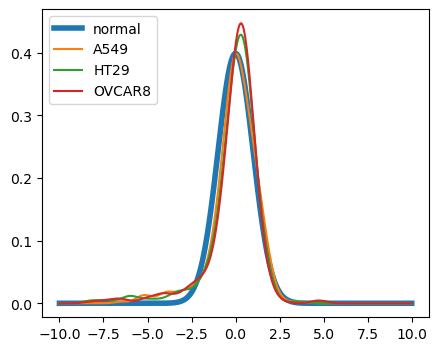

In [31]:
## Representation of a kernel-density estimate using Gaussian kernels.Kernel density estimation is a way to estimate
# the probability density function (PDF) of a random variable in a non-parametric way. gaussian_kde works for both 
# uni-variate and multi-variate data. It includes automatic bandwidth determination. The estimation works best for
# a unimodal distribution; bimodal or multi-modal distributions tend to be oversmoothed.
xx = linspace(-10,10,500)
kde_a549 = stats.gaussian_kde( zdLFC.A549 )
kde_ht29 = stats.gaussian_kde( zdLFC.HT29 )
kde_ovcar8 = stats.gaussian_kde( zdLFC.OVCAR8 )
figure( figsize(5,4) )
plot( xx, stats.norm.pdf( xx), label='normal', linewidth=4 )
plot( xx, kde_a549.evaluate(xx), label='A549')
plot( xx, kde_ht29.evaluate(xx), label='HT29' )
plot( xx, kde_ovcar8.evaluate(xx), label='OVCAR8' )

legend(loc=2)
#savefig('normfit-of-zdLFC.pdf')
show()


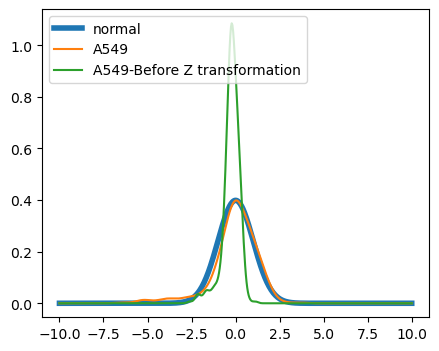

In [32]:
kde_a549_dlfc = stats.gaussian_kde( dLFC.A549 )

figure( figsize(5,4) )
plot( xx, stats.norm.pdf( xx), label='normal', linewidth=4 )
plot( xx, kde_a549.evaluate(xx), label='A549')
plot( xx, kde_a549_dlfc.evaluate(xx), label='A549-Before Z transformation' )

legend(loc=2)
#savefig('normfit-of-zdLFC.pdf')
show()

In [33]:
def reindex_alphbetically(df):
    result = []
    for index, row in df.iterrows():
        a, b = index.split('_')
        if a < b:
            result.append(f'{a}_{b}')
        else:
            result.append(f'{b}_{a}')
    
    
    return(result)


zdLFC.index = reindex_alphbetically(zdLFC)
print(zdLFC)
zdLFC.to_csv("zdLFC Output/DeDe_zdLFC.csv", index=True)  # Set index=False to exclude the index column


                     A549      HT29    OVCAR8
ABHD4_ABHD5     -0.607016 -0.037011 -0.048302
ABL1_ABL2        0.087697  0.886663  0.080356
ABR_BCR          1.883471  0.778018  1.044274
ACAP2_ACAP3      2.692670  1.999119  2.080933
ACTG1_ACTR1B     0.946709  3.524901  4.763899
...                   ...       ...       ...
ZNF619_ZNF620    0.285157 -0.102048  0.170539
ZNF747_ZNF764    1.462064  0.714486  0.929625
ZNF764_ZNF785    0.521223  0.533311  0.623892
ZSCAN21_ZSCAN30  0.343290  0.253739  0.340751
ZSWIM4_ZSWIM6    0.025816 -0.812372 -0.104794

[403 rows x 3 columns]
